# Input variable ranges

In [1]:

# from os import path
import numpy as np
import json
import time

# singlesegment():
array_length = 100000001    

dt = 60 # Time step
dx = 1800 # segment length
# bw = np.linspace(0.135, 230.035, array_length, endpoint=True) # Trapezoidal bottom width
bw = np.linspace(112.000000000000000000, 150.000000000000000000, array_length, endpoint=True) # Trapezoidal bottom width
tw = np.linspace(150.000000000000000, 500.000000000000000, array_length, endpoint=True) # Channel top width (at bankfull)
# twcc = np.linspace(0.67, 1150.17, array_length, endpoint=True) # Flood plain width
twcc = np.linspace(500.000000000000000, 650.000000000000000, array_length, endpoint=True)  # Flood plain width
n_manning = np.linspace(.010000000000000000, .050000000000000000, array_length, endpoint=True)   # manning roughness of channel
n_manning_cc = np.linspace(.010000000000000000, .050000000000000000, array_length, endpoint=True) # manning roughness of floodplain
cs = np.linspace(0.085000000000000000, 2.254000000000000000, array_length, endpoint=True)# channel trapezoidal sideslope
s0 = np.linspace(0.0000000000000000, .002000000000000000, array_length, endpoint=True) # Lateral inflow in this time step
qup = np.linspace(.010000000000000000, 1.0000000000000000, array_length, endpoint=True) # Flow from the upstream neighbor in the previous timestep
# quc = np.linspace(10, 1000, array_length, endpoint=True) # Flow from the upstream neighbor in the current timestep 
quc = np.linspace(.010000000000000000, 1.0000000000000000, array_length, endpoint=True)  # Flow from the upstream neighbor in the current timestep 
# qdp = np.linspace(10, 1000, array_length, endpoint=True) # Flow at the current segment in the previous timestep
qdp = np.linspace(.010000000000000000, 1.000000000000000, array_length, endpoint=True)  # Flow at the current segment in the previous timestep
qlat = np.linspace(35.0000000000000000, 45.00000000000001, array_length, endpoint=True) # lat inflow into current segment in the current timestep
velp = np.linspace(0.050000000000000000, .10000000000000000, array_length, endpoint=True) # Velocity in the current segment in the previous timestep NOT USED AS AN INPUT!!!
depthp = np.linspace(0.01000000000000000 ,.0110000000000000000 , array_length, endpoint=True) # D

In [2]:
# singlesegment(dt = 60.0, # diff
#     dx = 1800.0, # diff
#     bw = 112.0, #small diff
#     tw = 448.0,# small diff
#     twcc = 623.5999755859375, # no difference
#     n_manning = .02800000086426735, #diff
#     n_manning_cc = .03136000037193298, # no difference
#     cs = 1.399999976158142, # tiny diff
#     s0 = .0017999999690800905, # big diff
#     qlat = 40.0, # diff
#     qup = .04598825052380562, # almost 1 to 1 with quc
#     quc = .04598825052380562,
#     qdp = .21487340331077576, # same as qup quc
#     velp = .070480190217494964, # no difference
#     depthp = 0.010033470578491688) # large diff

# Import MC function to generate real output values

In [3]:
import mc_sseg_stime_NOLOOP as mc

def singlesegment(
        dt # dt
        , qup = None # qup can be anything
        , quc = None # quc will not be more than a 10 percent diff than qup
        , qlat = None # ql can be anything - key 
        , qdp = None # qdp will not be more than 20 percent diff than qup+qlat
        , dx = None # dx fully variable 
        , bw = None # bw correlated to tw, tw always > bw
        , tw = None # tw correlated to bw, bw always < tw
        , twcc = None # twcc always > than tw, tw of broader floodplain
        , n_manning = None # usually smaller than n_manning_cc
        , n_manning_cc = None # ncc usually greater than n_manning
        , cs = None # cs correlated to bw and tw
        , s0 = None # s0 variable 
        , velp = None # velocity at previous time step not rel
        , depthp = None # depth at previous time step starting point for iteration depthp = approx(y_direct(bw,n_manning,s0,avg(qup,qdp)))
    ):

    
    

    
    # call Fortran routine
    return mc.muskingcungenwm(
        dt, qup, quc, qdp, qlat, dx, bw, tw, twcc
        ,n_manning, n_manning_cc, cs, s0, velp, depthp
    )
    #return qdc, vel, depth
     

# Create random combinations of variables to feed into the network

In [4]:
import random 
from random import randint



Y = []
M = []
# dtx = []
# qupx = []
# qucx = []
# qlatx = []
# qdpx = []
# dxx = []
# bwx = []
# twx = []
# twccx = []
# n_manningx = []
# n_manning_ccx = []
# csx = []
# s0x = []
# velpx = []
# depthpx = []

num_samp = 10000000
for i in range(num_samp):
    j = randint(0,array_length-1)
    k = randint(0,array_length-1)
    l = randint(0,array_length-1)
    m = randint(0,array_length-1)
    o = randint(0,array_length-1)
    p = randint(0,array_length-1)
    q = randint(0,array_length-1)
    r = randint(0,array_length-1)
    s = randint(0,array_length-1)
    t = randint(0,array_length-1)
    u = randint(0,array_length-1)
    v = randint(0,array_length-1)
    w = randint(0,array_length-1)
    x = randint(0,array_length-1)
    y = randint(0,array_length-1)

    M.append([dt, qup[t], quc[j], qlat[y],qdp[v],dx,  bw[l], tw[m], twcc[j],n_manning[o], n_manning_cc[p], cs[r], s0[s], velp[w], depthp[x]])
#     dtx.append(dt)
#     qupx.append(qup[t])
#     qucx.append(quc[j])
#     qlatx.append(qlat[y])
#     qdpx.append(qdp[v])
#     dxx.append(dx)
#     bwx.append(bw[l])
#     twx.append(tw[m])
#     twccx.append(twcc[j])
#     n_manningx.append(n_manning[o])
#     n_manning_ccx.append(n_manning_cc[p])
#     csx.append(cs[r])
#     s0x.append(s0[s])
#     velpx.append(velp[w])
#     depthpx.append(depthp[x])
dt = 60.0 # diffxxxxx
dx = 1800.0 # diffxxxxx
bw = 112.0 #small diffxxxxx
tw = 448.0# small diffxxxxx
twcc = 623.5999755859375 # no differencexxxxx
n_manning = .02800000086426735 #diffxxxxxxx
n_manning_cc = .03136000037193298 # no differencexxxxxxx
cs = 1.399999976158142 # tiny diffxxxxx
s0 = .0017999999690800905 # big diffxxxxxxxxx
qlat = 40.0 # diffxxxx
qup = .04598825052380562 # almost 1 to 1 with qucxxxx
quc = .04598825052380562#xxxxxx
qdp = .21487340331077576 # same as qup qucxxxxx
velp = .070480190217494964 # no differencedepthp = 0.010033470578491688) # large diff
depthp = 0.010033470578491688
BB = []
M.append([dt, qup, quc, qlat,qdp,dx,  bw, tw, twcc,n_manning, n_manning_cc, cs, s0, velp, depthp])
# dtx.append(dt)
# qupx.append(qup)
# qucx.append(quc)
# qlatx.append(qlat)
# qdpx.append(qdp)
# dxx.append(dx)
# bwx.append(bw)
# twx.append(tw)
# twccx.append(twcc)
# n_manningx.append(n_manning)
# n_manning_ccx.append(n_manning_cc)
# csx.append(cs)
# s0x.append(s0)
# velpx.append(velp)
# depthpx.append(depthp)

M = np.array(M)
for i in range(0,len(M),1):
    S = singlesegment(*M[i])
    Y.append(S[0])
Y = np.array(Y)    




print(Y[-1])
print(M[-1])

0.7570106983184814
[6.00000000e+01 4.59882505e-02 4.59882505e-02 4.00000000e+01
 2.14873403e-01 1.80000000e+03 1.12000000e+02 4.48000000e+02
 6.23599976e+02 2.80000009e-02 3.13600004e-02 1.39999998e+00
 1.79999997e-03 7.04801902e-02 1.00334706e-02]


In [5]:
# print(qupx[-1])

In [6]:
# import sklearn.preprocessing
# from sklearn.preprocessing import MinMaxScaler

# x_scale = MinMaxScaler(feature_range=(0,1))

# dtx = x_scale.fit_transform(np.array(dtx).reshape(-1,1)).reshape(num_samp+1)
# qupx = x_scale.fit_transform(np.array(qupx).reshape(-1,1)).reshape(num_samp+1)
# qucx = x_scale.fit_transform(np.array(qucx).reshape(-1,1)).reshape(num_samp+1)
# qlatx = x_scale.fit_transform(np.array(qlatx).reshape(-1,1)).reshape(num_samp+1)
# qdpx = x_scale.fit_transform(np.array(qdpx).reshape(-1,1)).reshape(num_samp+1)
# dxx = x_scale.fit_transform(np.array(dxx).reshape(-1,1)).reshape(num_samp+1)
# bwx = x_scale.fit_transform(np.array(bwx).reshape(-1,1)).reshape(num_samp+1)
# twx = x_scale.fit_transform(np.array(twx).reshape(-1,1)).reshape(num_samp+1)
# twccx = x_scale.fit_transform(np.array(twccx).reshape(-1,1)).reshape(num_samp+1)
# n_manningx = x_scale.fit_transform(np.array(n_manningx).reshape(-1,1)).reshape(num_samp+1)
# n_manning_ccx = x_scale.fit_transform(np.array(n_manning_ccx).reshape(-1,1)).reshape(num_samp+1)
# csx = x_scale.fit_transform(np.array(csx).reshape(-1,1)).reshape(num_samp+1)
# s0x = x_scale.fit_transform(np.array(s0x).reshape(-1,1)).reshape(num_samp+1)
# velpx = x_scale.fit_transform(np.array(velpx).reshape(-1,1)).reshape(num_samp+1)
# depthpx = x_scale.fit_transform(np.array(depthpx).reshape(-1,1)).reshape(num_samp+1)


In [7]:
# All_Norm = []
# for i in range(0,len(dtx),1):
    
#     All_Norm.append([dtx[i],qupx[i],qucx[i],qlatx[i],qdpx[i],dxx[i],bwx[i],twx[i],twccx[i],n_manningx[i],n_manning_ccx[i],csx[i],s0x[i],velpx[i],depthpx[i]])

In [8]:
# All_Norm = np.array(All_Norm)

In [9]:
# All_Norm[-1]

In [10]:
Y[-1]

0.7570106983184814

In [11]:
singlesegment(*M[-1])

(0.7570106983184814, 0.12373604625463486, 0.02334451675415039)

# Set aside 10% of the data for testing the rest is used for training

In [12]:
TOP = int(len(Y)*.9)



# Normalize the data so that all values are between 0-1

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

x_scale = MinMaxScaler(feature_range=(-1,1))
y_scale = MinMaxScaler(feature_range=(-1,1))

X = x_scale.fit_transform(M)

Y_norm = y_scale.fit_transform(Y.reshape(-1,1))

In [14]:
X.shape

(10000001, 15)

In [15]:
Y

array([0.42669529, 0.66817665, 0.74271482, ..., 0.99751955, 0.88072658,
       0.7570107 ])

In [16]:
X[0:4]

array([[-1.00000000e+00, -7.54263895e-01,  7.12868488e-01,
         7.72567039e-01,  2.59795262e-01, -1.00000000e+00,
        -3.88243794e-01, -7.58492849e-01,  7.12868488e-01,
        -5.27106109e-01, -5.52028162e-01, -1.26443941e-01,
        -3.74128889e-01,  3.55247045e-01, -3.57016791e-01],
       [-1.00000000e+00,  2.26257565e-01,  7.36935954e-01,
         3.57801327e-01,  9.14370393e-04, -1.00000000e+00,
        -1.70738102e-02,  4.10027963e-01,  7.36935954e-01,
         1.91592919e-01, -2.87353407e-01,  8.20011124e-01,
         3.62859068e-01,  6.66748160e-02, -9.51947397e-01],
       [-1.00000000e+00, -7.43224795e-01,  2.97884484e-01,
        -4.56297413e-01,  8.75608147e-01, -1.00000000e+00,
        -9.03147509e-02, -9.04760618e-02,  2.97884484e-01,
        -1.17200988e-01,  1.35509588e-01,  2.61149374e-01,
        -3.72671169e-01, -6.65240580e-01, -5.11710726e-01],
       [-1.00000000e+00, -2.20553404e-01, -4.39219900e-01,
         5.34424844e-02, -1.88731531e-01, -1.00000000

In [17]:
All_Norm.shape

NameError: name 'All_Norm' is not defined

# Train the model

Train on 8100000 samples, validate on 900000 samples
Epoch 1/10
8100000/8100000 [==============================] - 879s 109us/sample - loss: 0.0635 - mse: 0.0635 - mean_absolute_error: 0.1962 - val_loss: 7.4454 - val_mse: 7.4454 - val_mean_absolute_error: 2.6621
Epoch 2/10
8100000/8100000 [==============================] - 880s 109us/sample - loss: 0.0574 - mse: 0.0574 - mean_absolute_error: 0.1872 - val_loss: 0.1440 - val_mse: 0.1440 - val_mean_absolute_error: 0.3064
Epoch 3/10
8100000/8100000 [==============================] - 857s 106us/sample - loss: 0.0577 - mse: 0.0577 - mean_absolute_error: 0.1878 - val_loss: 1.3738 - val_mse: 1.3738 - val_mean_absolute_error: 1.1478
Epoch 4/10
8100000/8100000 [==============================] - 858s 106us/sample - loss: 0.0585 - mse: 0.0585 - mean_absolute_error: 0.1890 - val_loss: 29.5131 - val_mse: 29.5132 - val_mean_absolute_error: 5.4248
Epoch 5/10
8100000/8100000 [==============================] - 858s 106us/sample - loss: 0.0563 - mse: 0.0

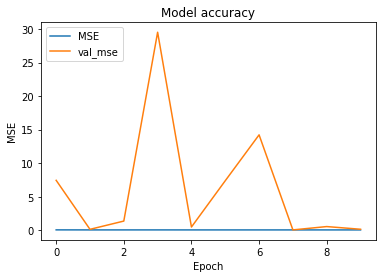

In [19]:
from pylab import *
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# import time
# start_time = time.time()



#Define the model
def baseline_model():
    model = tf.keras.Sequential()
    model.add(Dense(256, activation=tf.nn.relu, input_shape=[15],use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
#     model.add(Dense(256, activation='relu'))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu'))
    
    model.add(Dense(1, activation = 'linear'))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse','mean_absolute_error'])
    return model
# model.summary()
#Use the model
regr = baseline_model()

history = regr.fit(M[:TOP], Y[:TOP], epochs=10, batch_size=10,  validation_split=0.1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE', 'val_mse'], loc='upper left')
plt.show()
# print("--- %s seconds ---" % (time.time() - start_time))

In [20]:
regr.predict(M[-1:])


array([[0.49115807]], dtype=float32)

In [62]:
Y[-1]

0.7570106983184814

In [295]:
%%timeit
for i in range(1,10,1):
    regr.predict(X[-1:])
# singlesegment(*(M[-1:]))

115 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [298]:
%%timeit
regr.predict(X[-1000000:])

11.7 s ± 76.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [156]:
print(*M[-1])
f = []
f.append(M[-1])
print(f)
singlesegment(*(M[-1]))

60.0 0.04598825052380562 0.04598825052380562 40.0 0.21487340331077576 1800.0 112.0 448.0 623.5999755859375 0.02800000086426735 0.03136000037193298 1.399999976158142 0.0017999999690800905 0.07048019021749496 0.010033470578491688
[array([6.00000000e+01, 4.59882505e-02, 4.59882505e-02, 4.00000000e+01,
       2.14873403e-01, 1.80000000e+03, 1.12000000e+02, 4.48000000e+02,
       6.23599976e+02, 2.80000009e-02, 3.13600004e-02, 1.39999998e+00,
       1.79999997e-03, 7.04801902e-02, 1.00334706e-02])]


(0.7570106983184814, 0.12373604625463486, 0.02334451675415039)

In [162]:
def MC_ML(
        dt = None # dt
        , qup = None # qup can be anything
        , quc = None # quc will not be more than a 10 percent diff than qup
        , qlat = None # ql can be anything - key 
        , qdp = None # qdp will not be more than 20 percent diff than qup+qlat
        , dx = None # dx fully variable 
        , bw = None # bw correlated to tw, tw always > bw
        , tw = None # tw correlated to bw, bw always < tw
        , twcc = None # twcc always > than tw, tw of broader floodplain
        , n_manning = None # usually smaller than n_manning_cc
        , n_manning_cc = None # ncc usually greater than n_manning
        , cs = None # cs correlated to bw and tw
        , s0 = None # s0 variable 
        , velp = None # velocity at previous time step not rel
        , depthp = None # depth at previous time step starting point for iteration depthp = approx(y_direct(bw,n_manning,s0,avg(qup,qdp)))
    ):

    
#     print(dt, qup, quc, qdp, qlat, dx, bw, tw, twcc,n_manning, n_manning_cc, cs, s0, velp, depthp)

    D=[]
    D.append([dt, qup, quc, qlat,qdp,dx,  bw, tw, twcc,n_manning, n_manning_cc, cs, s0, velp, depthp])# 
    print(D)
    L = np.array(D)   
    
#     new_model = tf.keras.models.load_model('ML_MC_PRES5')
    print(x_scale.transform(L))
    k = regr.predict((M[-1:]))
    f = singlesegment(*(L[0]))
    print(f)
    print(k)


In [163]:
MC_ML(dt = 60.0,
      qup = 0.04598825052380562,
      quc = 0.04598825052380562,
      qlat = 40.0,
      qdp = 0.21487340331077576,
      
      dx = 1800.0,
       bw = 112.0,
    tw = 448.0,
      
    twcc = 623.5999755859375,
    n_manning = 0.02800000086426735,
    n_manning_cc = 0.03136000037193298,
      
    cs = 1.399999976158142,
    s0 = 0.0017999999690800905,
      velp = 0.070480190217494964,
    depthp = 0.010033470578491688
)


[[60.0, 0.04598825052380562, 0.04598825052380562, 40.0, 0.21487340331077576, 1800.0, 112.0, 448.0, 623.5999755859375, 0.02800000086426735, 0.03136000037193298, 1.399999976158142, 0.0017999999690800905, 0.07048019021749496, 0.010033470578491688]]
[[0.         0.03634958 0.03635112 0.5000004  0.20694125 0.
  0.         0.85142862 0.82400021 0.45000034 0.53399932 0.60627101
  0.90000138 0.40960369 0.03346985]]
(0.7570106983184814, 0.12373604625463486, 0.02334451675415039)
[[0.62169987]]


# Save and load the model

In [40]:
# Save the model
regr.save('ML_MC_PRES6',save_format='tf')

# Recreate the exact same model purely from the file
new_model = tf.keras.models.load_model('ML_MC_PRES6')


INFO:tensorflow:Assets written to: ML_MC_PRES6/assets


In [21]:
k = new_model.predict(X[-1000:])

In [22]:
F = np.reshape(Y, (1000000,1))

ValueError: cannot reshape array of size 999999 into shape (1000000,1)

In [758]:
sum(abs((F[-1000:]-k))/len(k))

0.6754002772858367

# Mean error

In [759]:
#     dt = 60.0 # Time step
#     dx = 1800.0 # segment length
#     bw = 112.0 # Trapezoidal bottom width
#     tw = 448.0 # Channel top width (at bankfull)
#     twcc = 623.5999755859375 # Flood plain width
#     n_manning = 0.02800000086426735 # manning roughness of channel
#     n_manning_cc = 0.03136000037193298 # manning roughness of floodplain
#     cs = 1.399999976158142 # channel trapezoidal sideslope
#     s0 = 0.0017999999690800905 # downstream segment bed slope
#     qlat = 40.0 # Lateral inflow in this time step
#     qup = 0.04598825052380562 # Flow from the upstream neighbor in the previous timestep
#     quc = 0.04598825052380562 # Flow from the upstream neighbor in the current timestep 
#     qdp = 0.21487340331077576 # Flow at the current segment in the previous timestep
#     velp = 0.070480190217494964 # Velocity in the current segment in the previous timestep NOT USED AS AN INPUT!!!
#     depthp = 0.010033470578491688 # Depth at the current segment in the previous timestep

#     qdc_expected = 0.7570106983184814
#     velc_expected = 0.12373604625463486
#     depthc_expected = 0.02334451675415039


In [649]:
F[-1000:]

array([[16.27231789],
       [16.33083916],
       [ 3.36943436],
       [ 9.27402401],
       [14.18408108],
       [ 9.55485058],
       [12.78274727],
       [11.30297184],
       [ 5.21933174],
       [12.38276958],
       [14.21167278],
       [20.8422718 ],
       [ 9.73670292],
       [ 8.26274014],
       [16.6267128 ],
       [10.32447529],
       [22.24718094],
       [12.94053936],
       [21.41121292],
       [22.09893417],
       [17.4264679 ],
       [13.15768242],
       [20.28363419],
       [ 9.4154129 ],
       [27.18625069],
       [24.14031792],
       [10.85059357],
       [ 4.23190975],
       [19.91231537],
       [15.18591118],
       [ 9.34839439],
       [21.95438766],
       [ 8.09623623],
       [ 8.82172012],
       [ 8.75085545],
       [15.89103317],
       [14.72710991],
       [28.82242393],
       [25.00494003],
       [19.98118401],
       [13.89856243],
       [ 8.43013   ],
       [14.14398193],
       [ 6.62554979],
       [12.31067944],
       [ 8

In [622]:
y_scale.inverse_transform(k)

array([[15.936161 ],
       [16.289623 ],
       [ 3.5234823],
       [ 9.25899  ],
       [14.194905 ],
       [10.057189 ],
       [12.805871 ],
       [11.657103 ],
       [ 5.2458982],
       [12.600372 ],
       [14.284544 ],
       [20.890018 ],
       [ 9.694484 ],
       [ 8.36179  ],
       [16.686943 ],
       [10.417466 ],
       [22.505182 ],
       [12.897262 ],
       [21.60075  ],
       [22.150393 ],
       [17.51873  ],
       [13.248202 ],
       [20.816927 ],
       [ 9.566903 ],
       [27.283993 ],
       [24.19285  ],
       [10.897833 ],
       [ 4.336303 ],
       [20.04667  ],
       [15.355856 ],
       [ 9.377932 ],
       [22.233398 ],
       [ 7.8828034],
       [ 8.786778 ],
       [ 8.975547 ],
       [16.00926  ],
       [14.716438 ],
       [28.272541 ],
       [24.985895 ],
       [20.062946 ],
       [14.0129795],
       [ 8.527603 ],
       [14.304301 ],
       [ 6.588775 ],
       [12.368961 ],
       [ 8.196475 ],
       [ 8.8747225],
       [13.49

In [623]:
singlesegment(dt = 60.0,
    dx = 1800.0,
    bw = 112.0,
    tw = 448.0,
    twcc = 623.599,
    n_manning = 0.0280,
    n_manning_cc = 0.03136,
    cs = 1.399,
    s0 = 0.0017,
    qlat = 40.0,
    qup = 0.0459,
    quc = 0.04598,
    qdp = 0.2148,
    velp = 0.0704,
    depthp = 0.0100)

(0.7409044504165649, 0.12009695172309875, 0.02329999953508377)

# Conclusions 
- we expect a decrease in the computation time compared to running the MC code and will compare results soon
- model accuracy can be improved further
- we can apply this type of mimicking to other processes or general predictions


In [558]:
# x = []
# dt = 60.0
# dx = 1800.0
# bw = 112.0
# tw = 448.0
# twcc = 623.5999755859375
# n_manning = 0.02800000086426735
# n_manning_cc = 0.03136000037193298
# cs = 1.399999976158142
# s0 = 0.0017999999690800905
# qlat = 40.0
# qup = 0.04598825052380562
# quc = 0.04598825052380562
# qdp = 0.21487340331077576
# velp = 0.070480190217494964
# depthp = 0.010033470578491688
# x.append([dt,dx,qup ,quc,qdp ,qlat ,bw ,tw ,twcc ,n_manning ,n_manning_cc ,cs, s0 ,velp ,depthp] )
# x = list(x)
# print(x)
# print(x[0][0])
# singlesegment(dt=x[0][0],dx=x[0][1],qup=x[0][2],quc=x[0][3],qdp=x[0][4],qlat=x[0][5],bw=x[0][6],tw=x[0][7],twcc=x[0][8],n_manning=x[0][9],n_manning_cc=x[0][10],cs=x[0][11],s0=x[0][12],velp=x[0][13],depthp=x[0][14])